In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import math

## Jupyter 的魔法函数

In [2]:
%ls

README.md         week1part1.ipynb  week2part1.ipynb
sources/          week1part2.ipynb  week2part2.ipynb
sources2/         week1part3.ipynb  week3.ipynb


In [3]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets("data/MNIST/", one_hot=False)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


## 使用numpy数据结构


https://hrvip.ucdavis.edu/share/SS2015/ipynb/NumPy%20Tutorial.pdf

In [4]:
data.test.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
data.test.images[:,0].shape

(10000,)

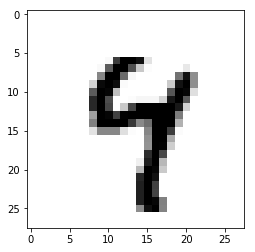

In [31]:
plt.imshow(data.train.images[2].reshape((28,28)), cmap='binary')

# Tensorflow 导入设置

In [5]:
import tensorflow as tf 
import keras.backend.tensorflow_backend as K
config = tf.ConfigProto() 
config.gpu_options.allow_growth=True #不全部占满显存, 按需分配 
session = tf.Session(config=config) # 设置session 
K.set_session(session)

Using TensorFlow backend.


In [44]:
from keras.layers import Dense

# 阅读TF文档

https://www.tensorflow.org/api_docs/python/

## 需要浏览的文档包括

### Session

https://www.tensorflow.org/api_docs/python/tf/Session


### Layers

https://www.tensorflow.org/api_docs/python/tf/layers


### Keras Layers

https://www.tensorflow.org/api_docs/python/tf/keras/layers


### Keras Losses

https://www.tensorflow.org/api_docs/python/tf/keras/losses


### Keras metrics

https://www.tensorflow.org/api_docs/python/tf/keras/metrics

### Keras optimizers

https://www.tensorflow.org/api_docs/python/tf/keras/optimizers


### Keras Sequential Model

https://www.tensorflow.org/api_docs/python/tf/keras/models/Sequential

<img src="./sources2/Dense_K.png" alt="drawing" width="500"/>

### 下面是一个错误的例子

In [48]:
x = data.train.images[2]
f = Dense(32, activation='relu')
y = f(x)

ValueError: Layer dense_3 was called with an input that isn't a symbolic tensor. Received type: <class 'numpy.ndarray'>. Full input: [array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.02352941, 0.76470596,
       0.9960785 , 1.        , 0.93725497, 0.1137255 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02352941, 0.6392157 , 0.9960785 , 0.9960785 , 0.6862745 ,
       0.21568629, 0.01176471, 0.        , 0.        , 0.        ,
       0.        , 0.09019608, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.47450984, 0.9960785 ,
       0.9960785 , 0.5803922 , 0.03137255, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.54901963, 0.9294118 ,
       0.43921572, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.16862746, 0.9607844 , 0.9960785 , 0.9490197 , 0.01568628,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.20784315, 0.92549026, 0.9960785 , 0.43921572, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.6431373 , 0.9960785 ,
       0.9803922 , 0.2509804 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.6627451 , 0.9960785 ,
       0.97647065, 0.1254902 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.83921576, 0.9960785 , 0.69803923, 0.        ,
       0.        , 0.01176471, 0.03529412, 0.03529412, 0.03529412,
       0.17254902, 0.909804  , 0.9960785 , 0.64705884, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.83921576,
       0.9960785 , 0.7254902 , 0.        , 0.21176472, 0.7294118 ,
       0.9960785 , 0.9960785 , 0.9960785 , 0.9960785 , 0.9960785 ,
       0.9058824 , 0.16862746, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.37647063, 0.9960785 , 0.9803922 ,
       0.74509805, 0.98823535, 0.9960785 , 0.9960785 , 0.9960785 ,
       0.9960785 , 0.9960785 , 0.9960785 , 0.50980395, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.49411768, 0.9960785 , 0.9960785 , 0.9960785 , 0.9960785 ,
       0.7803922 , 0.46274513, 0.5686275 , 0.9960785 , 0.9960785 ,
       0.9960785 , 0.30588236, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.10980393, 0.47058827,
       0.47058827, 0.47058827, 0.1254902 , 0.01176471, 0.        ,
       0.47450984, 0.9960785 , 0.9960785 , 0.76470596, 0.01568628,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.43137258, 0.9960785 ,
       0.9960785 , 0.33333334, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.41960788, 0.9960785 , 0.98823535, 0.19215688,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.8235295 ,
       0.9960785 , 0.7176471 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.05882353, 0.87843144, 0.9960785 , 0.2784314 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.27058825,
       0.9960785 , 0.97647065, 0.20784315, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.8470589 , 0.9960785 , 0.92549026,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.8745099 , 0.9960785 , 0.74509805, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.8745099 , 0.9960785 ,
       0.73333335, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.8745099 , 0.9960785 , 0.97647065, 0.49411768,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.44705886,
       0.9333334 , 0.9960785 , 0.48627454, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ], dtype=float32)]. All inputs to the layer should be tensors.

### 必须使用placeholder 计算图

In [49]:
x = data.train.images[2]
place = tf.placeholder(tf.float32, shape=(None, 784))
y = Dense(32, activation='relu')(place)

### 下面是一个错误的例子

placeholder 这样定义：

place = tf.placeholder(tf.float32, shape=(None, 784))


所以传入的必须是一个列表 [x1, x2, ..., xn] 而不能是单个的x

In [50]:
init_op = tf.global_variables_initializer()
sess.run(init_op)

sess.run(y, feed_dict={place:x})

ValueError: Cannot feed value of shape (784,) for Tensor 'Placeholder_1:0', which has shape '(?, 784)'

## 下面这样写是对的

In [51]:
init_op = tf.global_variables_initializer()
sess.run(init_op)

sess.run(y, feed_dict={place:[x]})

array([[0.1798093 , 0.19261843, 0.10328411, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.4473733 , 0.19923037,
        0.6322779 , 0.        , 0.        , 0.        , 0.        ,
        0.16593197, 0.        , 0.16502002, 0.3188473 , 0.10760564,
        0.        , 0.        , 0.55598235, 0.7764015 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.03289989]], dtype=float32)

In [62]:
from keras.layers import Activation, BatchNormalization, Conv2D, Dense, Flatten, Reshape

In [75]:
from keras.initializers import glorot_normal
place = tf.placeholder(tf.float32, shape=(None, 784))
f0 = Reshape((28,28, 1), input_shape=(784,))
f = Conv2D(16,
           kernel_size=(3, 3),
           strides=1,
           padding='same',
           kernel_initializer=glorot_normal())


In [76]:
place = tf.placeholder(tf.float32, shape=(None, 784))
x1 = f0(place)
x1.shape

TensorShape([Dimension(None), Dimension(28), Dimension(28), Dimension(1)])

In [77]:
f(x1)

<tf.Tensor 'conv2d_2/BiasAdd:0' shape=(?, 28, 28, 16) dtype=float32>

In [78]:
y = f(x1)

In [80]:
init_op = tf.global_variables_initializer()
sess.run(init_op)

result = sess.run(y, feed_dict={place:[x]})

In [81]:
result.sum()

22.743431

In [30]:
data.train.labels[2]

4

In [61]:
import numpy as np
a = np.array([[1,2,3], [3,4,5]], dtype=np.int32)
print('a:', a)
print('a[1]:',a[1])
dir(a)

x = dir(a)
public_method = [i for i in x if not i.startswith('__')]
print(public_method)

a: [[1 2 3]
 [3 4 5]]
a[1]: [3 4 5]
['T', 'all', 'any', 'argmax', 'argmin', 'argpartition', 'argsort', 'astype', 'base', 'byteswap', 'choose', 'clip', 'compress', 'conj', 'conjugate', 'copy', 'ctypes', 'cumprod', 'cumsum', 'data', 'diagonal', 'dot', 'dtype', 'dump', 'dumps', 'fill', 'flags', 'flat', 'flatten', 'getfield', 'imag', 'item', 'itemset', 'itemsize', 'max', 'mean', 'min', 'nbytes', 'ndim', 'newbyteorder', 'nonzero', 'partition', 'prod', 'ptp', 'put', 'ravel', 'real', 'repeat', 'reshape', 'resize', 'round', 'searchsorted', 'setfield', 'setflags', 'shape', 'size', 'sort', 'squeeze', 'std', 'strides', 'sum', 'swapaxes', 'take', 'tobytes', 'tofile', 'tolist', 'tostring', 'trace', 'transpose', 'var', 'view']


In [82]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD
from keras.losses import categorical_crossentropy
from keras.utils import np_utils
from keras.initializers import glorot_normal

In [83]:
model = Sequential()
model.add(Dense(10, input_dim=784,activation='softmax'))
model.compile(optimizer=SGD(0.01),
              loss=categorical_crossentropy,
              metrics=['accuracy'])


In [84]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [85]:
model.fit(x=data.train.images,
          y=np_utils.to_categorical(data.train.labels),
          epochs=1, batch_size=128)

Epoch 1/1
55000/55000 [==============================] - 1s 12us/step - loss: 1.3212 - acc: 0.6882


In [86]:
model.fit(x=data.train.images,
          y=np_utils.to_categorical(data.train.labels),
          epochs=50, batch_size=128)

Epoch 1/50
55000/55000 [==============================] - 1s 11us/step - loss: 0.7453 - acc: 0.8335
Epoch 2/50
55000/55000 [==============================] - 1s 10us/step - loss: 0.6091 - acc: 0.8561
Epoch 3/50
55000/55000 [==============================] - 1s 10us/step - loss: 0.5437 - acc: 0.8658
Epoch 4/50
55000/55000 [==============================] - 1s 10us/step - loss: 0.5037 - acc: 0.8728
Epoch 5/50
55000/55000 [==============================] - 1s 10us/step - loss: 0.4762 - acc: 0.8773
Epoch 6/50
55000/55000 [==============================] - 1s 10us/step - loss: 0.4559 - acc: 0.8807
Epoch 7/50
55000/55000 [==============================] - 1s 10us/step - loss: 0.4400 - acc: 0.8841
Epoch 8/50
55000/55000 [==============================] - 1s 10us/step - loss: 0.4272 - acc: 0.8862
Epoch 9/50
55000/55000 [==============================] - 1s 10us/step - loss: 0.4166 - acc: 0.8883
Epoch 10/50
55000/55000 [==============================] - 1s 10us/step - loss: 0.4076 - acc: 0.8899

In [87]:
logistics_weights = model.layers[0]

In [94]:
weights, biases = logistics_weights.get_weights()

In [95]:
weights

array([[-0.00350744, -0.05278964, -0.01372985, ...,  0.02548406,
         0.00518244, -0.0635209 ],
       [ 0.07198936, -0.03822793,  0.05574665, ...,  0.01525251,
         0.03462064, -0.01654595],
       [-0.0109562 ,  0.01638054, -0.01580504, ..., -0.0366535 ,
         0.02751941,  0.00389225],
       ...,
       [ 0.08175308,  0.07433303,  0.00209086, ...,  0.00827145,
         0.00075066, -0.02746235],
       [ 0.05340163,  0.07536889, -0.01460909, ..., -0.05635721,
         0.03004786, -0.079626  ],
       [-0.07446443,  0.01163238,  0.00180797, ...,  0.05974288,
        -0.03268239,  0.01131237]], dtype=float32)

In [97]:
biases

array([-0.22786446,  0.28304377,  0.00651777, -0.1633409 ,  0.05108438,
        0.76256347, -0.05410507,  0.39604208, -0.9101991 , -0.14374371],
      dtype=float32)

In [98]:
np.histogram(weights)

(array([  19,   64,  252, 1333, 3925, 1765,  401,   64,   14,    3]),
 array([-0.54481441, -0.42612247, -0.30743053, -0.18873859, -0.07004665,
         0.04864529,  0.16733723,  0.28602917,  0.40472111,  0.52341304,
         0.64210498]))

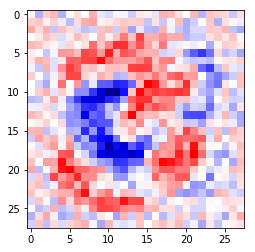

In [99]:
temp = weights[:,3].reshape((28, 28))

plt.imshow(temp, vmin=-0.5, vmax=0.5 ,interpolation='nearest', cmap='seismic')

In [66]:
temp

array([[ 1.79416463e-02, -9.01637450e-02,  2.23993473e-02,
         2.37304643e-02,  1.02134943e-01,  8.70887004e-03,
        -8.09962600e-02, -7.70021826e-02, -8.09983816e-03,
        -6.05262369e-02,  3.96910645e-02,  1.43318847e-02,
        -2.79372334e-01, -3.99402767e-01, -6.89866915e-02,
         6.27724826e-02,  2.76623219e-02, -4.84653264e-02,
         1.04139909e-01, -8.96064416e-02,  5.56727983e-02,
        -5.60635477e-02, -5.00113480e-02, -8.20378289e-02,
        -1.03063993e-01,  1.16132917e-02, -1.06954403e-01,
         4.66568917e-02],
       [ 3.58389057e-02,  3.07331868e-02, -4.43173945e-02,
        -2.99654454e-02,  3.08706556e-02,  5.25378548e-02,
        -7.95831308e-02, -1.81700721e-01, -4.26226199e-01,
        -5.58138609e-01, -3.74900907e-01, -2.14826703e+00,
        -2.72775292e+00, -2.27522540e+00, -1.32497454e+00,
        -5.66488743e+00, -5.85242939e+00, -5.63706875e+00,
        -8.00143301e-01, -9.27116156e-01, -2.93789053e+00,
        -1.32079434e+00, -7.23

In [104]:
from keras.models import Sequential
from keras.layers import Dense, InputLayer, MaxPooling2D
from keras.optimizers import Adam,SGD
from keras.losses import categorical_crossentropy
from keras.utils import np_utils
from keras.initializers import glorot_normal

In [105]:

model = Sequential()

# Add an input layer which is similar to a feed_dict in TensorFlow.
# Note that the input-shape must be a tuple containing the image-size.
model.add(InputLayer(input_shape=(784,)))

# The input is a flattened array with 784 elements,
# but the convolutional layers expect images with shape (28, 28, 1)
model.add(Reshape((28, 28, 1)))

# First convolutional layer with ReLU-activation and max-pooling.
model.add(Conv2D(kernel_size=5, strides=1, filters=16, padding='same',
                 activation='relu', name='layer_conv1'))
model.add(MaxPooling2D(pool_size=2, strides=2))

# Second convolutional layer with ReLU-activation and max-pooling.
model.add(Conv2D(kernel_size=5, strides=1, filters=36, padding='same',
                 activation='relu', name='layer_conv2'))
model.add(MaxPooling2D(pool_size=2, strides=2))

# Flatten the 4-rank output of the convolutional layers
# to 2-rank that can be input to a fully-connected / dense layer.
model.add(Flatten())
#   x \in (1,8000)  输入X


#   W \in (8000, 128) 参数矩阵  压缩
# First fully-connected / dense layer with ReLU-activation.
model.add(Dense(128, activation='relu'))   # 拿它做逻辑回归

#    x \in (1,128)

#      x1b1 + x2b2 ... xpbp   -->  exp(z)

# Last fully-connected / dense layer with softmax-activation
# for use in classification.
model.add(Dense(10, activation='softmax'))

In [110]:
from keras.optimizers import Adam

adam = Adam(lr=0.0025, decay=0.0)

In [112]:
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [116]:
model.fit(x=data.train.images,
          y=np_utils.to_categorical(data.train.labels),
          epochs=1, batch_size=128)

Epoch 1/1
55000/55000 [==============================] - 34s 611us/step - loss: 0.1487 - acc: 0.9544


In [117]:
result = model.evaluate(x=data.test.images,
                        y=np_utils.to_categorical(data.test.labels),)

10000/10000 [==============================] - 3s 265us/step


In [118]:
result

[0.04260935758487321, 0.9867]

In [119]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_5 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
layer_conv1 (Conv2D)         (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
layer_conv2 (Conv2D)         (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               225920    
__________

In [121]:
layer_input = model.layers[0]

In [123]:
layer_conv1 = model.layers[1]
layer_conv1

In [124]:
weights_conv1 = layer_conv1.get_weights()[0]

In [125]:
weights_conv1.shape

(5, 5, 1, 16)

In [126]:
def plot_conv_weights(weights, input_channel=0):
    # Get the lowest and highest values for the weights.
    # This is used to correct the colour intensity across
    # the images so they can be compared with each other.
    w_min = np.min(weights)
    w_max = np.max(weights)

    # Number of filters used in the conv. layer.
    num_filters = weights.shape[3]

    # Number of grids to plot.
    # Rounded-up, square-root of the number of filters.
    num_grids = math.ceil(math.sqrt(num_filters))
    
    # Create figure with a grid of sub-plots.
    fig, axes = plt.subplots(num_grids, num_grids)

    # Plot all the filter-weights.
    for i, ax in enumerate(axes.flat):
        # Only plot the valid filter-weights.
        if i<num_filters:
            # Get the weights for the i'th filter of the input channel.
            # See new_conv_layer() for details on the format
            # of this 4-dim tensor.
            img = weights[:, :, input_channel, i]

            # Plot image.
            ax.imshow(img, vmin=w_min, vmax=w_max,
                      interpolation='nearest', cmap='seismic')
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

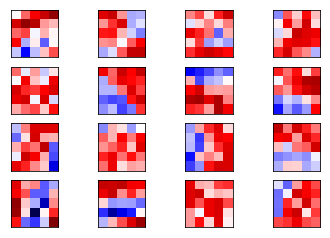

In [127]:
plot_conv_weights(weights_conv1)

In [128]:
def plot_conv_output(values):
    # Number of filters used in the conv. layer.
    num_filters = values.shape[3]

    # Number of grids to plot.
    # Rounded-up, square-root of the number of filters.
    num_grids = math.ceil(math.sqrt(num_filters))
    
    # Create figure with a grid of sub-plots.
    fig, axes = plt.subplots(num_grids, num_grids)

    # Plot the output images of all the filters.
    for i, ax in enumerate(axes.flat):
        # Only plot the images for valid filters.
        if i<num_filters:
            # Get the output image of using the i'th filter.
            img = values[0, :, :, i]

            # Plot image.
            ax.imshow(img, interpolation='nearest', cmap='binary')
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [129]:
from keras import backend as K

In [130]:
output_conv1 = K.function(inputs=[layer_input.input],
                          outputs=[layer_conv1.output])

In [134]:
layer_output1 = output_conv1([[data.train.images[2]]])[0]
layer_output1.shape

(1, 28, 28, 16)

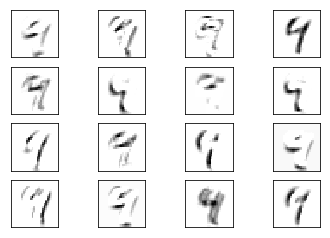

In [135]:
plot_conv_output(values=layer_output1)

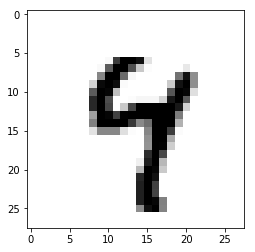

In [136]:
plt.imshow(data.train.images[2].reshape((28,28)), cmap='binary')